<html>
<body>
    <div class="image-container" style="display: flex;">
        <img src="https://ufal.br/ufal/resolveuid/5ba5577fc45f41f48a6e8e9311488b28" alt="Image 1" style="width: 15%; height: auto;">
        <img src="https://ic.ufal.br/site-logo" alt="Image 2" style="width: 15%; height: auto;">
    </div>
   <h1 align="center"> Redes Neurais e Aprendizado Profundo - 2023.1 </h1>
   <h2 align="center"> Professor: Tiago Figueiredo Vieira </h2>
</body>
</html>

---

# Classification using Perceptrons

The following graph shows the distribution of samples (features $x_1$ and $x_2$) related to 2 (two) categories. With the Perceptron you developed using only Numpy, provide a model capable of reasonably classifying such samples. Obs: For training procedure, use files (which are represented by light red and cyan in the graph);

| Samples | Labels |
|---|---|
| X_train.npy | y_train.npy |

And for testing, use the following files (which are represented by dark blue and dark red in the graph):

| Samples | Labels |
|---|---|
| X_test.npy | y_test.npy |

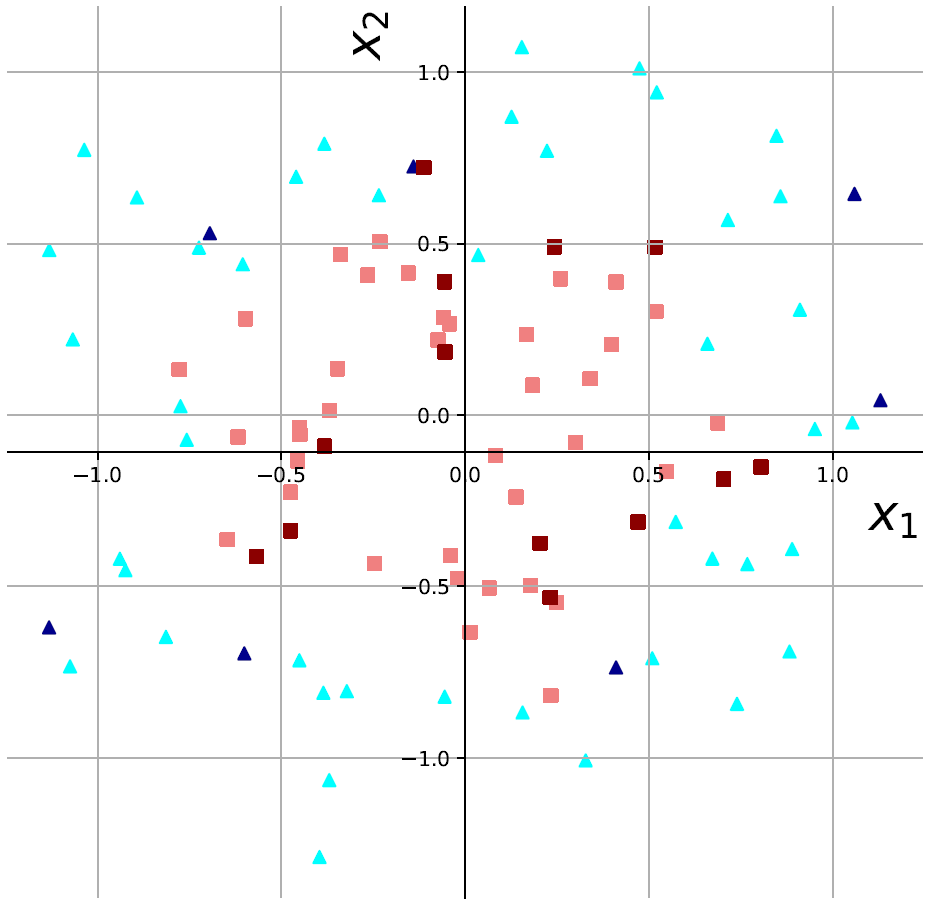

In [516]:
def accuracy(predictions, y_test):
    classifications = len(y_test)
    correct_classifications = sum(p == r for p, r in zip(predictions, y_test))
    return correct_classifications / classifications

In [517]:
# Por padrão utilizar os nomes 'predictions' e 'y_test'

predictions = [1, 1, 1, 1, 1]
y_test = [1, 1, 2, 1, 1]

In [527]:
import numpy as np
import matplotlib.pyplot as plt

def fit(X, y, n_iter=100, learning_rate=0.1):
    n_samples, n_features = X.shape

    X = np.concatenate([X, np.ones((n_samples, 1))], axis=1)
    weights = np.random.default_rng().random(n_features + 1)

    for _ in range(n_iter):
        linear_output = X @ weights
        y_pred = (linear_output > 0).astype(int)

        misclassified = np.nonzero(y_pred != y)[0]
        if misclassified.size == 0:
            break

        for i in misclassified:
            delta = learning_rate * (y[i] - y_pred[i]) * X[i, :]
            weights += delta

    return weights

def predict(X, weights):
    n_samples = X.shape[0]
    X = np.concatenate([X, np.ones((n_samples, 1))], axis=1)
    linear_output = X @ weights
    predictions = (linear_output > 0).astype(int)

    return predictions

def plot_predict(X, y, weights):
    plt.scatter(X[:, 0], X[:, 1], c=y)
    x_line = np.linspace(np.min(X[:, 0]), np.max(X[:, 0]), num=100)
    y_line = (-weights[0] * x_line - weights[2]) / weights[1]
    plt.plot(x_line, y_line, color='black')
    plt.title('Predictions')
    plt.show()


In [519]:
X_test = np.load('X_test.npy')
X_train = np.load('X_train.npy')
y_test = np.load('y_test.npy')
y_train = np.load('y_train.npy')

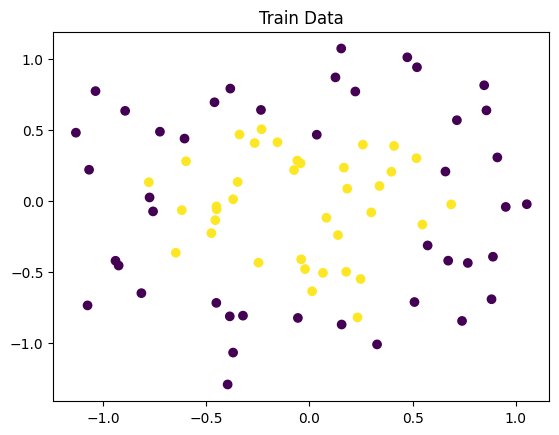

In [545]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
plt.title('Train Data')
plt.show()

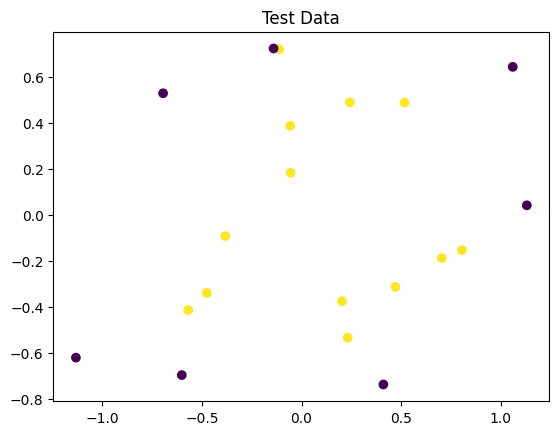

In [544]:
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
plt.title('Test Data')
plt.show()

In [558]:
weights = fit(X_train, y_train)

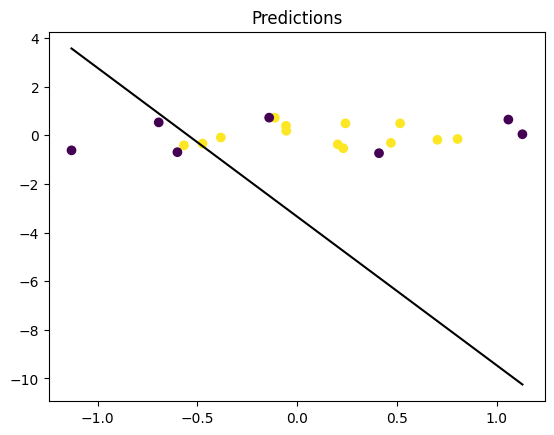

In [559]:
predictions = predict(X_test, weights)

plot_predict(X_test, y_test, weights)

In [560]:
accuracy(predictions, y_test)

0.75

In [561]:
assert accuracy(predictions, y_test) > 0.55

In [562]:
assert accuracy(predictions, y_test) > 0.60